# data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [38]:
## 지수 표기법 변경
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

In [14]:
## 원본 읽어오기
df0 = pd.read_parquet( "../data/df0.parquet" )
print(df0.shape)
display(df0.head(2))

(5623810, 14)


,id,age,man,push,frgn,birth,sign,buy,pre,post,c_back,dscnt,total,m_id
2639466,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,43000,35000,0,8000,8000,9
2619610,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,10900,5900,0,5000,5000,7


# Segmentation을 위한 feature 생성

## 기존 feature 중 그대로 사용할 feature
- man
- push
- frgn

## 연령대별

## 구매 횟수별 (once and more)

In [15]:
# 구매 빈도 분포 확인
df0_cus = df0.groupby('id').sum()
a = df0.groupby('id').count().reset_index()[['id','m_id']]
a = a.rename(columns={'m_id':'count'})
df0_cus = df0_cus.merge(a,on='id')

,id,age,man,push,frgn,pre,post,c_back,dscnt,total,m_id,count
0,1,70,0,0,0,24330,18960,0,5370,5370,8,2
1,2,52,0,0,0,25030,19359,0,5671,5671,16,2
2,3,40,1,1,0,18120,13440,0,4680,4680,4,1
3,4,280,8,8,0,227640,216980,0,10660,10660,57,8
4,5,264,0,6,0,65170,55170,0,10000,10000,44,6
...,...,...,...,...,...,...,...,...,...,...,...,...
544916,544917,54,0,0,0,41220,34740,0,6480,6480,15,2
544917,544918,483,0,21,0,268665,252665,2296,16000,18296,98,21
544918,544919,1763,0,43,0,529022,483123,177,45899,46076,199,43
544919,544920,343,7,7,0,462100,429100,441,33000,33441,35,7


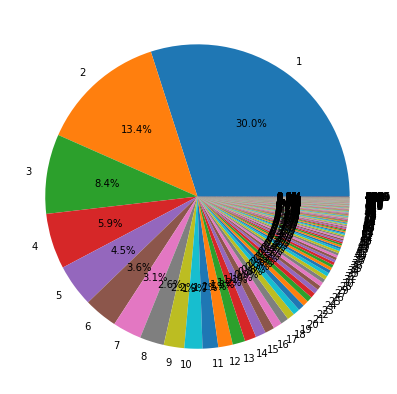

In [22]:
df0_cus['count'].value_counts()
plt.figure(figsize=(7,7),facecolor="white")
labels = df0_cus['count'].value_counts().index.to_list()
plt.pie(df0_cus['count'].value_counts(),labels=labels,autopct='%.1f%%')
plt.show()

/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


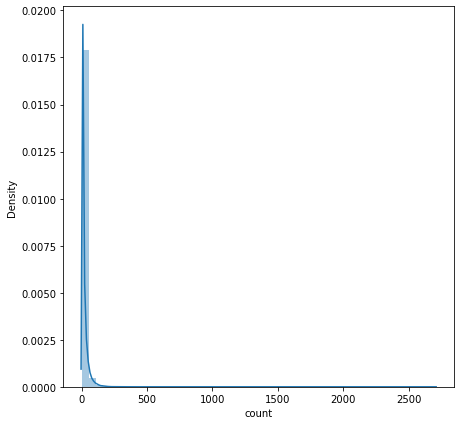

In [20]:
plt.figure(figsize=(7,7),facecolor='white')
sns.distplot(df0_cus['count'])
plt.show()

## 구매 금액별 (heavy and light)

In [24]:
df0_cus.describe()

,id,age,man,push,frgn,pre,post,c_back,dscnt,total,m_id,count
count,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000
mean,272461.000,395.777,2.851,5.335,0.114,211107.465,196438.240,1265.993,14669.225,15935.218,56.765,10.320
std,157305.287,862.049,10.293,17.769,4.137,550003.100,527836.212,4782.908,26430.607,28799.927,114.643,20.792
min,1.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136231.000,44.000,0.000,0.000,0.000,23800.000,20140.000,0.000,2000.000,3000.000,8.000,1.000
50%,272461.000,118.000,0.000,0.000,0.000,67300.000,60480.000,0.000,6000.000,6681.000,18.000,3.000
75%,408691.000,363.000,1.000,3.000,0.000,206356.000,191024.000,660.000,15396.000,16663.000,56.000,10.000
max,544921.000,83855.000,477.000,2705.000,1229.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,14875.000,2705.000


/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


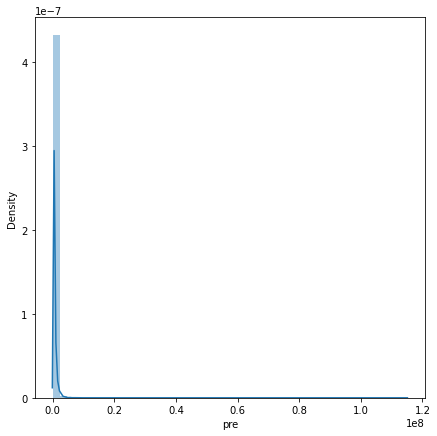

In [33]:
plt.figure(figsize=(7,7),facecolor='white')
sns.distplot(df0_cus['pre'])
plt.show()

In [31]:
len(df0_cus[df0_cus['pre']>500000])/len(df0_cus)

0.10662646512063216

In [52]:
len(np.histogram(df0_cus['pre'],100)[0])

100

In [53]:
np.histogram(df0_cus['pre'],100)[1]

array([5.000000e+02, 1.150548e+06, 2.300597e+06, 3.450646e+06,
       4.600694e+06, 5.750742e+06, 6.900791e+06, 8.050840e+06,
       9.200888e+06, 1.035094e+07, 1.150098e+07, 1.265103e+07,
       1.380108e+07, 1.495113e+07, 1.610118e+07, 1.725123e+07,
       1.840128e+07, 1.955132e+07, 2.070137e+07, 2.185142e+07,
       2.300147e+07, 2.415152e+07, 2.530157e+07, 2.645162e+07,
       2.760166e+07, 2.875171e+07, 2.990176e+07, 3.105181e+07,
       3.220186e+07, 3.335191e+07, 3.450196e+07, 3.565200e+07,
       3.680205e+07, 3.795210e+07, 3.910215e+07, 4.025220e+07,
       4.140225e+07, 4.255229e+07, 4.370234e+07, 4.485239e+07,
       4.600244e+07, 4.715249e+07, 4.830254e+07, 4.945259e+07,
       5.060263e+07, 5.175268e+07, 5.290273e+07, 5.405278e+07,
       5.520283e+07, 5.635288e+07, 5.750292e+07, 5.865297e+07,
       5.980302e+07, 6.095307e+07, 6.210312e+07, 6.325317e+07,
       6.440322e+07, 6.555326e+07, 6.670331e+07, 6.785336e+07,
       6.900341e+07, 7.015346e+07, 7.130351e+07, 7.2453

In [57]:
cnt = np.histogram(df0_cus['pre'],100)[0].tolist()
cnt.append(1)
dis_data = pd.DataFrame( {"price":np.histogram(df0_cus['pre'],100)[1], "cnt":cnt})
dis_data['cnt_rate'] = dis_data['cnt']/sum(dis_data['cnt'])
dis_data

,price,cnt,cnt_rate
0,500.000,528290,0.969
1,1150548.500,12950,0.024
2,2300597.000,2388,0.004
3,3450645.500,677,0.001
4,4600694.000,275,0.001
...,...,...,...
96,110405156.000,1,0.000
97,111555204.500,0,0.000
98,112705253.000,0,0.000
99,113855301.500,1,0.000


## 시간대별